# Dataset Stats

> Useful stats about our data.

In [13]:
import pandas as pd
import librosa as lr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metadata = pd.read_csv("data/dataset/metadata.csv")

## Let's look into the sources

First let's see how many rows we have in total.

In [3]:
row_count = metadata.shape[0]

In [22]:
# Add a column with the audio length in seconds
AUDIO_PATH = "data/dataset/audio/"
metadata['length'] = metadata['filename'].apply(lambda x: lr.core.get_duration(filename=AUDIO_PATH + x))

Let's look at the distribution of sources.

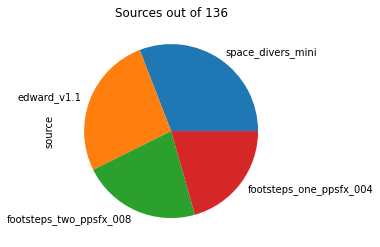

In [27]:
metadata["source"].value_counts().plot(kind="pie", title='Sources out of ' + str(row_count))
plt.gcf().set_facecolor("white")

More importantly, what's the distribution of each high-level category and how much they contribute in audio length.

<AxesSubplot:title={'center':'Length per Category'}, ylabel='length'>

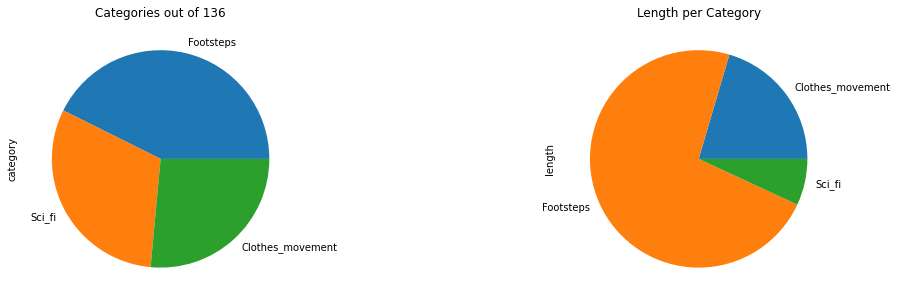

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.8)
plt.gcf().set_facecolor("white")

plt.subplot(1, 2, 1)
metadata["category"].value_counts().plot(kind='pie', title='Categories out of ' + str(row_count))
plt.subplot(1, 2, 2)
metadata.groupby("category")["length"].sum().plot(kind="pie", title='Length per Category')

<AxesSubplot:title={'center':'Length of audio files'}, ylabel='Frequency'>

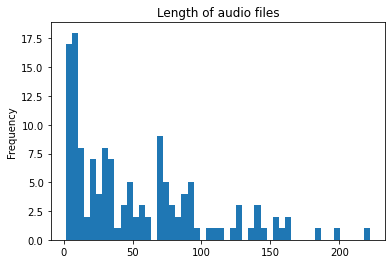

In [48]:
metadata["length"].plot(kind="hist", bins=50, title='Length of audio files')

## Let's look into our labels

Now let's investigate how many labels are defined per audio file.

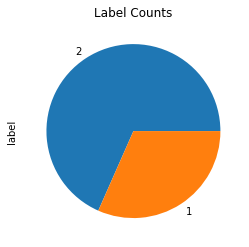

In [5]:
metadata["label"].str.split(",").apply(len).value_counts().plot(kind='pie', title='Label Counts')
plt.gcf().set_facecolor("white")

Next we look at the occurrences for each individual label, both the top and bottom.  

Ideally our data covers sufficient labels, but doesn't treat every row as a different type.  
This means we want to have as many different types of labels as possible, while minimising the number of single occurrence labels.  

<AxesSubplot:title={'center':'Bottom 10 Labels'}>

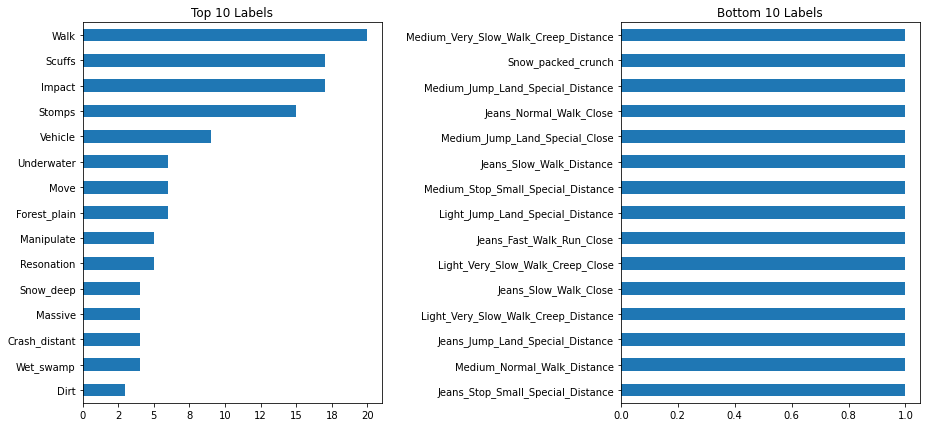

In [6]:
how_many = 15
label_occurrences = metadata["label"].str.split(",").apply(pd.Series, 1).stack().value_counts().sort_values()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, how_many // 2))
fig.subplots_adjust(wspace=0.8)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))

plt.subplot(1, 2, 1)
label_occurrences[-how_many:].plot(kind='barh', title='Top 10 Labels')
plt.subplot(1, 2, 2)
label_occurrences[:how_many].plot(kind='barh', title='Bottom 10 Labels')


We have a bunch of single occurrence labels, let's count them.

In [7]:
sum(metadata["label"].str.split(",").apply(len) == 1)

43

Let's look at some of those rows with single labels.

In [12]:
metadata.loc[metadata["label"].str.split(",").apply(len) == 1].sample(15)

,filename,category,label,extra,source,version
103,289b7703cab05b0a.wav,Clothes_movement,Jeans_Very_Slow_Walk_Creep_Close,NaN,edward_v1.1,9
121,b7d0c194c9cf6388.wav,Clothes_movement,Medium_Slow_Walk_Close,NaN,edward_v1.1,9
131,2df310924806dc96.wav,Clothes_movement,Jeans_Fast_Walk_Run_Close,NaN,edward_v1.1,9
113,aaf611ea4563ee74.wav,Clothes_movement,Medium_Jump_Land_Special_Close,NaN,edward_v1.1,9
130,5400dc28a909c1b4.wav,Clothes_movement,Light_Jump_Land_Special_Distance,NaN,edward_v1.1,9
106,b5b2f2ab18f57142.wav,Clothes_movement,Light_Normal_Walk_Distance,NaN,edward_v1.1,9
63,8ddba56fcca44a78.wav,Footsteps,Snow_scrape_long,Footsteps Snow Boots Scrape Long Length Slide ...,footsteps_one_ppsfx_004,7
117,b8d5de4d6c9d0724.wav,Clothes_movement,Light_Slow_Walk_Distance,NaN,edward_v1.1,9
109,4619fa82e2260c71.wav,Clothes_movement,Medium_Normal_Walk_Distance,NaN,edward_v1.1,9
33,5520a168ea71e83b.wav,Sci_fi,Bubbles,NaN,space_divers_mini,6


Sounds like the `Clothes_movement` category needs more attention.